In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input,Conv2D
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import ayers, model

In [2]:
tmp=np.zeros((4,4))
print(tmp)
print('-'*30)
print(tmp.reshape(4,4,1))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
------------------------------
[[[0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]]]


### 1. 텐서플로우 데이터셋의 흑백 28,28 손글씨 자료 50개를 갖고와서  CNN에 넣기 위하여 28,28,1로 변형 

In [10]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#  CNN 은 무조건 3채널이어야함. 흑백 28,28 도 28,28,1로 변경해야함.
train_images = train_images.reshape((60000, 28, 28, 1))[:50]  # 샘플링으로 50개만
test_images = test_images.reshape((10000, 28, 28, 1))[:50]
train_labels=train_labels[:50]
test_labels=test_labels[:50]


###  2. 학습의 편의성을 위하여 50개 이미지를 높이, 너비를 10,10 으로 변경


In [7]:
train_labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [19]:
plt.figure(figsize=(15,3))
from skimage.transform import resize
train_images = resize(train_images, (50,10, 10,1)) # 28,28 을 10,10으로 크기 줄임. 넘파이로 되어있는 이미지 사이즈 조정
test_images = resize(train_images, (50,10, 10,1))
np.shape(train_images)



(50, 10, 10, 1)

<Figure size 1500x300 with 0 Axes>

(50, 10, 10)


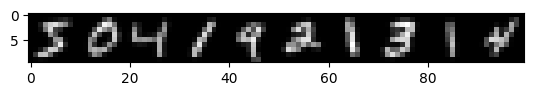

In [20]:
### plot모듈에서는 컬러(행,열,3)이거나, 흑백(행,열) 이어야함

tmp=train_images.reshape(50,10,10)    #넘파이 reshape
print(tmp.shape)
plt.imshow(np.hstack(tmp[:10]),cmap='gray')

In [21]:
pd.DataFrame(np.vstack(train_images[0]).reshape(10,10))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000e+00,0.000000e+00,3.779813e-09,5.703982e-07,0.000004,1.042152e-05,0.000015,8.009369e-06,1.619335e-08
1,0.000000,3.493966e-07,7.807178e-04,7.999273e-03,2.619184e-02,0.059819,1.155171e-01,0.155306,7.679844e-02,1.519801e-04
2,0.000000,9.857660e-05,1.036307e-01,5.545328e-01,7.500384e-01,0.815209,6.413300e-01,0.491694,1.539254e-01,2.481732e-04
3,0.000000,2.617595e-05,5.656854e-02,4.300613e-01,8.046835e-01,0.233121,1.624373e-01,0.008346,1.218553e-03,5.837837e-07
4,0.000000,9.748591e-09,1.279662e-04,2.502775e-02,5.374982e-01,0.290856,3.380014e-02,0.000305,1.190274e-08,0.000000e+00
5,0.000000,0.000000e+00,6.266862e-09,2.610279e-04,6.696573e-02,0.564458,5.666593e-01,0.047100,1.411354e-05,0.000000e+00
6,0.000000,4.497760e-08,3.063738e-05,3.220381e-03,7.633813e-02,0.401042,8.656932e-01,0.157746,1.073702e-04,0.000000e+00
7,0.000008,5.200728e-03,7.889449e-02,3.434775e-01,7.748787e-01,0.739755,3.174749e-01,0.021589,2.289392e-06,0.000000e+00
8,0.000387,2.102920e-01,6.982965e-01,7.215174e-01,3.777502e-01,0.048582,1.853358e-03,0.000010,1.813034e-10,0.000000e+00
9,0.000029,1.430609e-02,3.384249e-02,1.997844e-02,1.852532e-03,0.000012,1.298005e-08,0.000000,0.000000e+00,0.000000e+00


### 3. 계산검증의 편의성을 위하여 float를 int로 변경

In [22]:
train_images=(train_images*10).astype('int32')
test_images=(test_images*10).astype('int32')
pd.DataFrame(np.vstack(train_images[0]).reshape(10,10))

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0
2,0,0,1,5,7,8,6,4,1,0
3,0,0,0,4,8,2,1,0,0,0
4,0,0,0,0,5,2,0,0,0,0
5,0,0,0,0,0,5,5,0,0,0
6,0,0,0,0,0,4,8,1,0,0
7,0,0,0,3,7,7,3,0,0,0
8,0,2,6,7,3,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


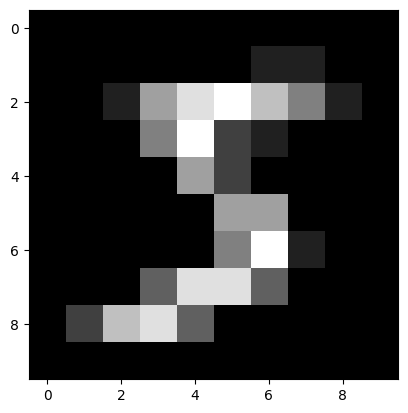

In [23]:
plt.imshow(train_images[0].reshape(10,10),cmap='gray')

### 4. CNN 모델 제작

In [24]:
import tensorflow as tf
#tf.random.set_seed(123)
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                        

In [26]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 4, 4, 1) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 2, 2, 2) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

### 5. 모델 w값 setting

- model = models.Sequential()
- <font color='red'> model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1))) </font>
-  model.add(layers.MaxPooling2D((2, 2)))
- model.add(layers.Conv2D(2, (3, 3), activation='relu'))

- model.add(layers.Flatten())
- model.add(layers.Dense(2, activation='relu'))
- model.add(layers.Dense(10, activation='softmax'))


In [27]:
# 모델의 첫번째 레이어만 사용
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
visual_model.summary()      
test_img = np.expand_dims(test_images[0], axis = 0)  # 텐서단위로 변환.  test_images[0].reshape(1,10,10,1)
feature_maps = visual_model.predict(test_img)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 182ms/step


In [28]:
len(visual_model.get_weights()),\
visual_model.get_weights()[0],\
visual_model.get_weights()[1]


(2,
 array([[[[ 0.39287972]],
 
         [[ 0.1617409 ]],
 
         [[ 0.2718202 ]]],
 
 
        [[[-0.01809049]],
 
         [[-0.0150553 ]],
 
         [[ 0.3466239 ]]],
 
 
        [[[ 0.5161172 ]],
 
         [[-0.5550892 ]],
 
         [[ 0.23455775]]]], dtype=float32),
 array([0.], dtype=float32))

In [29]:
setW =np.array( [[-0.4318703, 0.08380783, -0.23193197],
           [0.05313462, 0.25442973, 0.33345792],
           [-0.22227043, -0.02131751, 0.17737235]])
setB= np.array([-0.00019932])


setW=setW.reshape(3,3,1,1)
weights =setW,setB
visual_model.set_weights(weights)

In [30]:
### 검증을 위한 w,b값 출력
w=visual_model.get_weights()[0]   
b=visual_model.get_weights()[1]  
np.shape(w),np.vstack(w).reshape(3,3),b

((3, 3, 1, 1),
 array([[-0.4318703 ,  0.08380783, -0.23193197],
        [ 0.05313462,  0.25442973,  0.33345792],
        [-0.22227043, -0.02131751,  0.17737235]], dtype=float32),
 array([-0.00019932], dtype=float32))

### 6. 모델 결과 계산 (feature_maps 계산)

In [31]:
# 파이썬에서 직접 계산하여 봅니다.
wVal=np.vstack(w).reshape(3,3)
img=np.vstack(train_images[0]).reshape(10,10)
img[:3,:3]*wVal, np.sum(img[:3,:3]*wVal)+b

(array([[-0.        ,  0.        , -0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.        , -0.        ,  0.17737235]]),
 array([0.17717303], dtype=float32))

In [32]:
# 파이썬에서 직접 계산하여 봅니다.
wVal=np.vstack(w).reshape(3,3)
img=np.vstack(train_images[0]).reshape(10,10)
print('▶--- 0:3, 0:3 에서 스트라이드 1한  높이 0:3, 너비 1:4 인덱싱값 ')
print(img[0:3, 1:4])

print('\n▶-- img[0:3, 1:4] * w')
print(img[0:3,1:4]*wVal)
      
print('\n▶-- img[0:3, 1:4] * w의 합 + b')      
np.sum(img[0:3,1:4]*wVal)+b

▶--- 0:3, 0:3 에서 스트라이드 1한  높이 0:3, 너비 1:4 인덱싱값 
[[0 0 0]
 [0 0 0]
 [0 1 5]]

▶-- img[0:3, 1:4] * w
[[-0.          0.         -0.        ]
 [ 0.          0.          0.        ]
 [-0.         -0.02131751  0.88686176]]

▶-- img[0:3, 1:4] * w의 합 + b


array([0.86534494], dtype=float32)

### 7. 모델 최종값 계산- Relu 함수에 의해서 – 값은 0으로 변경됨

,0,1,2,3,4,5,6,7
0,0.234558,0.617700,0.000000,0.571424,0.926078,2.068202,1.077759,1.491289
1,0.346624,2.656295,1.989106,0.670022,5.357805,2.062146,1.248598,0.305462
2,0.271820,2.907337,6.989884,3.465259,7.317204,6.181763,3.257972,1.733260
3,0.000000,1.087281,4.554645,5.199846,2.015120,0.716459,2.973466,0.000000
4,0.000000,0.000000,1.359101,4.023695,3.601829,0.000000,3.483396,0.516117
5,0.000000,0.703673,0.000000,2.050228,5.311445,4.874476,3.352971,0.000000
6,0.297168,0.383475,2.295954,5.301542,5.177728,2.965467,3.250507,0.392880
7,2.049633,3.115315,3.213906,4.041767,4.643533,3.235381,1.178639,0.000000


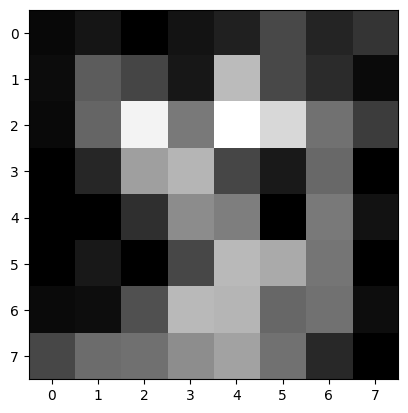

In [33]:
## 최종출력
len(feature_maps[0][0])
plt.imshow(feature_maps[0],cmap='gray')
pd.DataFrame(np.vstack(feature_maps[0]).reshape(8,8))

In [34]:
layer0=feature_maps.copy()

### 8. Pooling 레이어 값 확인
- model = models.Sequential()
- model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1)))
- <font color='red'> model.add(layers.MaxPooling2D((2, 2))) </fon>
- model.add(layers.Conv2D(2, (3, 3), activation='relu'))

- model.add(layers.Flatten())
- model.add(layers.Dense(2, activation='relu'))
- model.add(layers.Dense(10, activation='softmax'))



In [35]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[1])
visual_model.summary()     
test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 83ms/step


In [36]:
maxpoolResult=np.vstack(feature_maps[0].reshape(4,4))
maxpoolResult

array([[2.6310093 , 4.992998  , 2.6713054 , 1.0994523 ],
       [0.2577803 , 2.93569   , 0.        , 0.        ],
       [0.53191775, 2.331755  , 2.2812119 , 0.0529353 ],
       [3.2710578 , 2.146567  , 0.96608925, 0.        ]], dtype=float32)

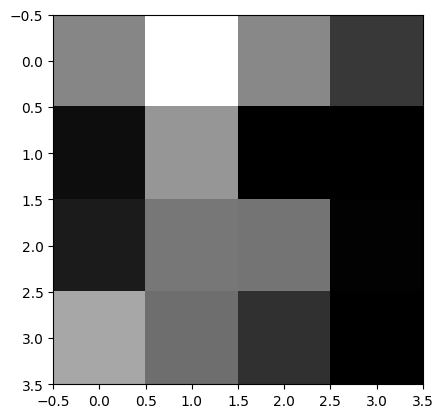

,0,1,2,3
0,2.631009,4.992998,2.671305,1.099452
1,0.257780,2.935690,0.000000,0.000000
2,0.531918,2.331755,2.281212,0.052935
3,3.271058,2.146567,0.966089,0.000000


In [37]:
plt.imshow(feature_maps[0],cmap='gray')
plt.show()
pd.DataFrame(np.vstack(feature_maps[0]).reshape(4,4))

### 9. Layer2
- model = models.Sequential()
- model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1))) 
- model.add(layers.MaxPooling2D((2, 2)))
- <font color='red'> model.add(layers.Conv2D(2, (3, 3), activation='relu'))</font>

- model.add(layers.Flatten())
- model.add(layers.Dense(2, activation='relu'))
- model.add(layers.Dense(10, activation='softmax'))

In [38]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[2])
visual_model.summary()  
test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 92ms/step


In [39]:
print(len(visual_model.get_weights()))
w=visual_model.get_weights()[0]     
b=visual_model.get_weights()[1]
print(np.vstack(w).reshape(3,3),b)
print(np.shape(w), np.shape(b))
print('-'*100)
w=visual_model.get_weights()[2]
b=visual_model.get_weights()[3]
print(w,b)

4
[[-0.4318703   0.08380783 -0.23193197]
 [ 0.05313462  0.25442973  0.33345792]
 [-0.22227043 -0.02131751  0.17737235]] [-0.00019932]
(3, 3, 1, 1) (1,)
----------------------------------------------------------------------------------------------------
[[[[-0.3952219  -0.3235737 ]]

  [[-0.3294989  -0.4332297 ]]

  [[ 0.20299956  0.0599108 ]]]


 [[[ 0.4670196  -0.32455704]]

  [[ 0.39513478 -0.15193477]]

  [[-0.43117878 -0.3260842 ]]]


 [[[-0.1534324  -0.08992046]]

  [[ 0.46196905  0.32082734]]

  [[-0.16057938  0.33547845]]]] [0. 0.]


In [40]:
setW =np.array( [[-0.4318703, 0.08380783, -0.23193197],
           [0.05313462, 0.25442973, 0.33345792],
           [-0.22227043, -0.02131751, 0.17737235]])
setB= np.array([-0.00019932])

w2=visual_model.get_weights()[2]
b2=visual_model.get_weights()[3]
setW=setW.reshape(3,3,1,1)

weights =[setW,setB,w2,b2]
visual_model.set_weights(weights)

In [41]:
len(visual_model.get_weights())
w=visual_model.get_weights()[2]
b=visual_model.get_weights()[3]
w, b

(array([[[[-0.3952219 , -0.3235737 ]],
 
         [[-0.3294989 , -0.4332297 ]],
 
         [[ 0.20299956,  0.0599108 ]]],
 
 
        [[[ 0.4670196 , -0.32455704]],
 
         [[ 0.39513478, -0.15193477]],
 
         [[-0.43117878, -0.3260842 ]]],
 
 
        [[[-0.1534324 , -0.08992046]],
 
         [[ 0.46196905,  0.32082734]],
 
         [[-0.16057938,  0.33547845]]]], dtype=float32),
 array([0., 0.], dtype=float32))

In [42]:
### 전체 w,b값 확인
visual_model.get_weights()

[array([[[[-0.4318703 ]],
 
         [[ 0.08380783]],
 
         [[-0.23193197]]],
 
 
        [[[ 0.05313462]],
 
         [[ 0.25442973]],
 
         [[ 0.33345792]]],
 
 
        [[[-0.22227043]],
 
         [[-0.02131751]],
 
         [[ 0.17737235]]]], dtype=float32),
 array([-0.00019932], dtype=float32),
 array([[[[-0.3952219 , -0.3235737 ]],
 
         [[-0.3294989 , -0.4332297 ]],
 
         [[ 0.20299956,  0.0599108 ]]],
 
 
        [[[ 0.4670196 , -0.32455704]],
 
         [[ 0.39513478, -0.15193477]],
 
         [[-0.43117878, -0.3260842 ]]],
 
 
        [[[-0.1534324 , -0.08992046]],
 
         [[ 0.46196905,  0.32082734]],
 
         [[-0.16057938,  0.33547845]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [43]:
# maxpooling을 거쳐 나온값인 maxpoolResult값하고 3,3 씩 곱하기함
maxpoolResult

array([[2.6310093 , 4.992998  , 2.6713054 , 1.0994523 ],
       [0.2577803 , 2.93569   , 0.        , 0.        ],
       [0.53191775, 2.331755  , 2.2812119 , 0.0529353 ],
       [3.2710578 , 2.146567  , 0.96608925, 0.        ]], dtype=float32)

In [44]:
f1=w[:,:,:,0]
f2=w[:,:,:,1]

print('maxpoolResult 값')
print(maxpoolResult[:3,:3])
print('\n▶피처1값','-'*100, )
print(f1.reshape(3,3))
print('\n▶피처2값','-'*100, )
print(f2.reshape(3,3))

print('\n▶[0:3,0:3]*피처1값+b[0]합','-'*50)
print(np.sum(maxpoolResult[:3,:3]*f1.reshape(3,3))+b[0])

print('\n▶[0:3,0:3]*피처2값+b[1]합','-'*50)
np.sum(maxpoolResult[:3,:3]*f2.reshape(3,3))+b[1]

maxpoolResult 값
[[2.6310093  4.992998   2.6713054 ]
 [0.2577803  2.93569    0.        ]
 [0.53191775 2.331755   2.2812119 ]]

▶피처1값 ----------------------------------------------------------------------------------------------------
[[-0.3952219  -0.3294989   0.20299956]
 [ 0.4670196   0.39513478 -0.43117878]
 [-0.1534324   0.46196905 -0.16057938]]

▶피처2값 ----------------------------------------------------------------------------------------------------
[[-0.3235737  -0.4332297   0.0599108 ]
 [-0.32455704 -0.15193477 -0.3260842 ]
 [-0.08992046  0.32082734  0.33547845]]

▶[0:3,0:3]*피처1값+b[0]합 --------------------------------------------------
-0.23309493

▶[0:3,0:3]*피처2값+b[1]합 --------------------------------------------------


-1.9185405

In [45]:
feature_maps

array([[[[0.        , 0.        ],
         [0.        , 0.        ]],

        [[0.        , 0.        ],
         [0.92423826, 0.        ]]]], dtype=float32)

In [46]:
f1=w[:,:,:,0]
f2=w[:,:,:,1]

print('maxpoolResult 값')
print(maxpoolResult[0:3,1:4])
print('\n▶피처1값','-'*100, )
print(f1.reshape(3,3))
print('\n▶피처2값','-'*100, )
print(f1.reshape(3,3))

print('\n▶[0:3,0:3]*피처1값+b[0]합','-'*50)
print(np.sum(maxpoolResult[0:3,1:4]*f1.reshape(3,3))+b[0])

print('\n▶[0:3,0:3]*피처2값+b[1]합','-'*50)
np.sum(maxpoolResult[0:3,1:4]*f2.reshape(3,3))+b[0]

maxpoolResult 값
[[4.992998  2.6713054 1.0994523]
 [2.93569   0.        0.       ]
 [2.331755  2.2812119 0.0529353]]

▶피처1값 ----------------------------------------------------------------------------------------------------
[[-0.3952219  -0.3294989   0.20299956]
 [ 0.4670196   0.39513478 -0.43117878]
 [-0.1534324   0.46196905 -0.16057938]]

▶피처2값 ----------------------------------------------------------------------------------------------------
[[-0.3952219  -0.3294989   0.20299956]
 [ 0.4670196   0.39513478 -0.43117878]
 [-0.1534324   0.46196905 -0.16057938]]

▶[0:3,0:3]*피처1값+b[0]합 --------------------------------------------------
-0.5717391

▶[0:3,0:3]*피처2값+b[1]합 --------------------------------------------------


-3.1198604

In [47]:
f1=w[:,:,:,0]
f2=w[:,:,:,1]

print('maxpoolResult 값')
print(maxpoolResult[1:4,0:3])
print('\n▶피처1값','-'*100, )
print(f1.reshape(3,3))
print('\n▶피처2값','-'*100, )
print(f2.reshape(3,3))


print('\n▶[0:3,0:3]*피처1값+b[0]합','-'*50)
print(np.sum(maxpoolResult[1:4,0:3]*f1.reshape(3,3))+b[0])

print('\n▶[0:3,0:3]*피처2값+b[1]합','-'*50)
np.sum(maxpoolResult[1:4,0:3]*f2.reshape(3,3))+b[0]

maxpoolResult 값
[[0.2577803  2.93569    0.        ]
 [0.53191775 2.331755   2.2812119 ]
 [3.2710578  2.146567   0.96608925]]

▶피처1값 ----------------------------------------------------------------------------------------------------
[[-0.3952219  -0.3294989   0.20299956]
 [ 0.4670196   0.39513478 -0.43117878]
 [-0.1534324   0.46196905 -0.16057938]]

▶피처2값 ----------------------------------------------------------------------------------------------------
[[-0.3235737  -0.4332297   0.0599108 ]
 [-0.32455704 -0.15193477 -0.3260842 ]
 [-0.08992046  0.32082734  0.33547845]]

▶[0:3,0:3]*피처1값+b[0]합 --------------------------------------------------
-0.54839635

▶[0:3,0:3]*피처2값+b[1]합 --------------------------------------------------


-1.9073739

In [48]:
f1=w[:,:,:,0]
f2=w[:,:,:,1]

print('maxpoolResult 값')
print(maxpoolResult[1:4,1:4])
print('\n▶피처1값','-'*100, )
print(f1.reshape(3,3))
print('\n▶피처2값','-'*100, )
print(f1.reshape(3,3))

print('\n▶[0:3,0:3]*피처1값+b[0]합','-'*50)
print(np.sum(maxpoolResult[1:4,1:4]*f1.reshape(3,3))+b[0])

print('\n▶[0:3,0:3]*피처2값+b[1]합','-'*50)
np.sum(maxpoolResult[1:4,1:4]*f2.reshape(3,3))+b[0]

maxpoolResult 값
[[2.93569    0.         0.        ]
 [2.331755   2.2812119  0.0529353 ]
 [2.146567   0.96608925 0.        ]]

▶피처1값 ----------------------------------------------------------------------------------------------------
[[-0.3952219  -0.3294989   0.20299956]
 [ 0.4670196   0.39513478 -0.43117878]
 [-0.1534324   0.46196905 -0.16057938]]

▶피처2값 ----------------------------------------------------------------------------------------------------
[[-0.3952219  -0.3294989   0.20299956]
 [ 0.4670196   0.39513478 -0.43117878]
 [-0.1534324   0.46196905 -0.16057938]]

▶[0:3,0:3]*피처1값+b[0]합 --------------------------------------------------
0.92423826

▶[0:3,0:3]*피처2값+b[1]합 --------------------------------------------------


-1.9536288

In [49]:
conv2=feature_maps
conv2

array([[[[0.        , 0.        ],
         [0.        , 0.        ]],

        [[0.        , 0.        ],
         [0.92423826, 0.        ]]]], dtype=float32)

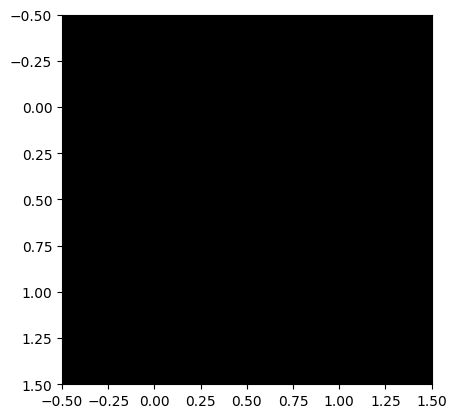

In [50]:
plt.imshow(feature_maps[0][0], cmap='gray')

### 10. flatten

- model = models.Sequential()
- model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1))) 
- model.add(layers.MaxPooling2D((2, 2)))
- model.add(layers.Conv2D(2, (3, 3), activation='relu'))

- <font color='red'>  model.add(layers.Flatten())</font>
- model.add(layers.Dense(2, activation='relu'))
- model.add(layers.Dense(10, activation='softmax'))

In [51]:
### 
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[3])
visual_model.summary()  
test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_______________________________________________________________

In [52]:
len(visual_model.get_weights())

4

In [53]:
feature_maps

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.92423826, 0.        ]], dtype=float32)

### 11. FNN

- model = models.Sequential()
- model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1))) 
- model.add(layers.MaxPooling2D((2, 2)))
- model.add(layers.Conv2D(2, (3, 3), activation='relu'))

-   model.add(layers.Flatten())
- <font color='red'>model.add(layers.Dense(2, activation='relu')) </font>
- model.add(layers.Dense(10, activation='softmax'))

In [54]:
### 
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[4])
visual_model.summary()  
test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                           

In [55]:
len(visual_model.get_weights())

6

In [56]:
flatten

NameError: name 'flatten' is not defined

In [57]:
w=visual_model.get_weights()[4]
b=visual_model.get_weights()[5]
w,b

(array([[ 0.7057836 ,  0.7314348 ],
        [-0.38434792,  0.52166116],
        [ 0.68755984, -0.23045576],
        [ 0.6194674 , -0.71168256],
        [ 0.4363252 , -0.19301945],
        [ 0.12389159, -0.29036775],
        [ 0.3052621 ,  0.34119928],
        [-0.37458417,  0.6941283 ]], dtype=float32),
 array([0., 0.], dtype=float32))

In [58]:
feature_maps

array([[0.2821349 , 0.31534943]], dtype=float32)

### 11. FNN

- model = models.Sequential()
- model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1))) 
- model.add(layers.MaxPooling2D((2, 2)))
- model.add(layers.Conv2D(2, (3, 3), activation='relu'))

-   model.add(layers.Flatten())
- model.add(layers.Dense(2, activation='relu')) 
- <font color='red'>model.add(layers.Dense(10, activation='softmax'))</font>

In [59]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[5])
visual_model.summary()  
test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 10, 10, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 1)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                           

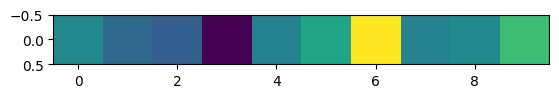

In [60]:
plt.imshow(feature_maps)